In [23]:
import pandas as pd

In [24]:
data=pd.read_csv("../data/yfinance_data/yfinance_data/AAPL_historical_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [25]:
data.info

<bound method DataFrame.info of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043

[*********************100%***********************]  1 of 1 completed

Performing technical analysis for AAPL from 2022-01-01 to 2025-06-01

First 5 rows of data:
Price             Open        High         Low       Close     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  174.542932  179.499589  174.425155  178.645660  104487900
2022-01-04  179.254175  179.558442  175.809046  176.378326   99310400
2022-01-05  176.290033  176.839679  171.411899  171.686722   94537600
2022-01-06  169.507721  172.059668  168.467317  168.820663   96904000
2022-01-07  169.694211  170.921105  167.868591  168.987518   86709100

Data with technical indicators (showing last 5 rows):
             Date        Open        High         Low       Close   Adj Close  \
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009

KeyError: 'RSI_14'

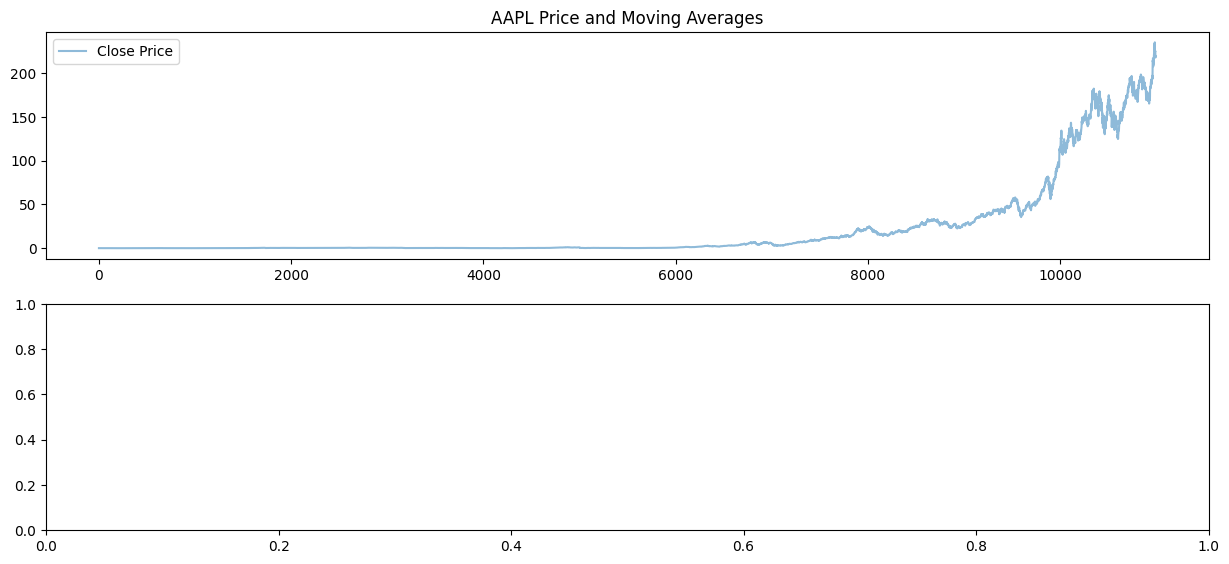

In [ ]:
# quantitative_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import yfinance as yf
from datetime import datetime

# Load and prepare the data
def load_data(ticker, start_date, end_date):
    """
    Download stock data from Yahoo Finance and prepare DataFrame
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    return data

# Calculate technical indicators
def calculate_indicators(data):
    """
    Calculate various technical indicators using TA-Lib
    """
    # Moving Averages
    data['SMA_20'] = ta.SMA(data['Close'], timeperiod=20)
    data['EMA_20'] = ta.EMA(data['Close'], timeperiod=20)
    
    # RSI (Relative Strength Index)
    data['RSI_14'] = ta.RSI(data['Close'], timeperiod=14)
    
    # MACD (Moving Average Convergence Divergence)
    data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(
        data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # Bollinger Bands
    data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(
        data['Close'], timeperiod=20)
    
    return data

# Visualize the data with indicators
def visualize_data(data, ticker):
    """
    Create visualizations of price data and technical indicators
    """
    plt.figure(figsize=(15, 10))
    
    # Price and Moving Averages
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data['SMA_20'], label='20-day SMA', alpha=0.75)
    plt.plot(data['EMA_20'], label='20-day EMA', alpha=0.75)
    plt.title(f'{ticker} Price and Moving Averages')
    plt.legend()
    
    # RSI
    plt.subplot(3, 1, 2)
    plt.plot(data['RSI_14'], label='14-day RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='green', alpha=0.5)
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    
    # MACD
    plt.subplot(3, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['MACD_signal'], label='Signal Line', color='orange')
    plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray')
    plt.title('Moving Average Convergence Divergence (MACD)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{ticker}_technical_analysis.png')
    plt.show()

# PyNance example (though PyNance is less common - we'll demonstrate similar functionality)
def calculate_financial_metrics(data):
    """
    Calculate basic financial metrics similar to what PyNance might provide
    """
    # Daily returns
    data['daily_return'] = data['Close'].pct_change() * 100
    
    # Volatility (standard deviation of returns)
    volatility = data['daily_return'].std()
    
    # Cumulative returns
    data['cumulative_return'] = (1 + data['daily_return']/100).cumprod() - 1
    
    print(f"\nFinancial Metrics:")
    print(f"Average Daily Return: {data['daily_return'].mean():.2f}%")
    print(f"Volatility (Std Dev of Daily Returns): {volatility:.2f}%")
    print(f"Final Cumulative Return: {data['cumulative_return'].iloc[-1]*100:.2f}%")
    
    return data

if __name__ == "__main__":
    # Configuration
    ticker = 'AAPL'
    start_date = '2022-01-01'
    end_date = datetime.now().strftime('%Y-%m-%d')
    
    print(f"Performing technical analysis for {ticker} from {start_date} to {end_date}")
    
    # Load data
    stock_data = load_data(ticker, start_date, end_date)
    print("\nFirst 5 rows of data:")
    print(stock_data.head())
    
    # Calculate indicators
    stock_data = data
    print("\nData with technical indicators (showing last 5 rows):")
    print(stock_data.tail())
    
    # Calculate financial metrics
    stock_data = calculate_financial_metrics(stock_data)
    
    # Visualize
    visualize_data(stock_data, ticker)
    
    print("\nAnalysis complete. Charts saved to file.")

In [ ]:
import pandas as pd
import ta

df = pd.read_csv('../data/yfinance_data/yfinance_data/AAPL_historical_data.csv')
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")


In [ ]:
df.head()